In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.2)
plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

data = pd.read_csv("car.csv")
print(data.shape)
# 当列数较多时，会显示不完整，可以设置最大显示列数。
pd.set_option("max_columns", 100)
data.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
data.duplicated().sum()

0

In [4]:
t = data["CarName"].str.split(" ", expand=True)
display(t.head(3))

,0,1,2,3,4
0,alfa-romero,giulia,None,None,None
1,alfa-romero,stelvio,None,None,None
2,alfa-romero,Quadrifoglio,None,None,None


In [5]:
data["CarName"] = t[0]
data["CarName"].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarName, dtype: int64

In [6]:
data["CarName"] = data["CarName"].replace({"maxda": "mazda", "Nissan": "nissan", "porcshce": "porsche", "toyouta": "toyota", "vokswagen": "volkswagen", "vw": "volkswagen"})
data["CarName"].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarName, dtype: int64

In [7]:
# 方案一。
# 定义列表，用来存放数值类型变量的名称。
number_var = []
for k, v in data.dtypes.items():
#     print("k:", k, ", v:", v)
    if np.issubdtype(v, np.number):
        number_var.append(k)
#         print(v, "\n")
print("数值类型变量个数：", len(number_var))
print(number_var)

数值类型变量个数： 16
['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [8]:
# 方案二
# 也可以使用DataFrame对象的select_dtypes方法，该方法会返回DataFrame
# 对象，包含所有符合参数指定的类型列。
print(data.select_dtypes(np.number).columns)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


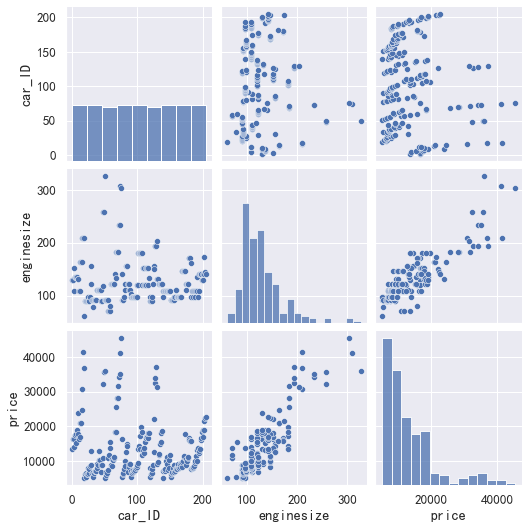

In [9]:
# 绘制变量之间的散点图矩阵。
# vars：指定使用哪些变量绘制，默认使用所有变量。
# 此处变量较多，故只选择了三个变量。
sns.pairplot(data, vars=["car_ID", "enginesize", "price"])

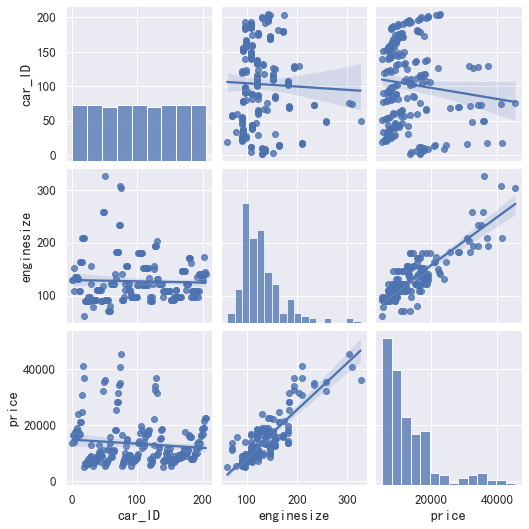

In [10]:
# kind：取值为scatter（默认）与reg。
# scatter：绘制散点图。
# reg：除了散点图外，同时绘制回归线与置信区间。
sns.pairplot(data, vars=["car_ID", "enginesize", "price"], kind="reg")

In [11]:
x = data["carlength"]
y = data["carwidth"]
# 计算carwidth与carheight的协方差。
a = (x - x.mean()) * (y - y.mean())
cov = np.sum(a) / (len(a) - 1)
print("协方差：", cov)
# 计算carwidth与carheight的相关系数。
corr = cov / (x.std() * y.std())
print("相关系数：", corr)

print("协方差：", x.cov(y))
print("相关系数：", x.corr(y))

协方差： 22.26103515064563
相关系数： 0.8411182684818455
协方差： 22.261035150645633
相关系数： 0.841118268481846


In [12]:
data.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


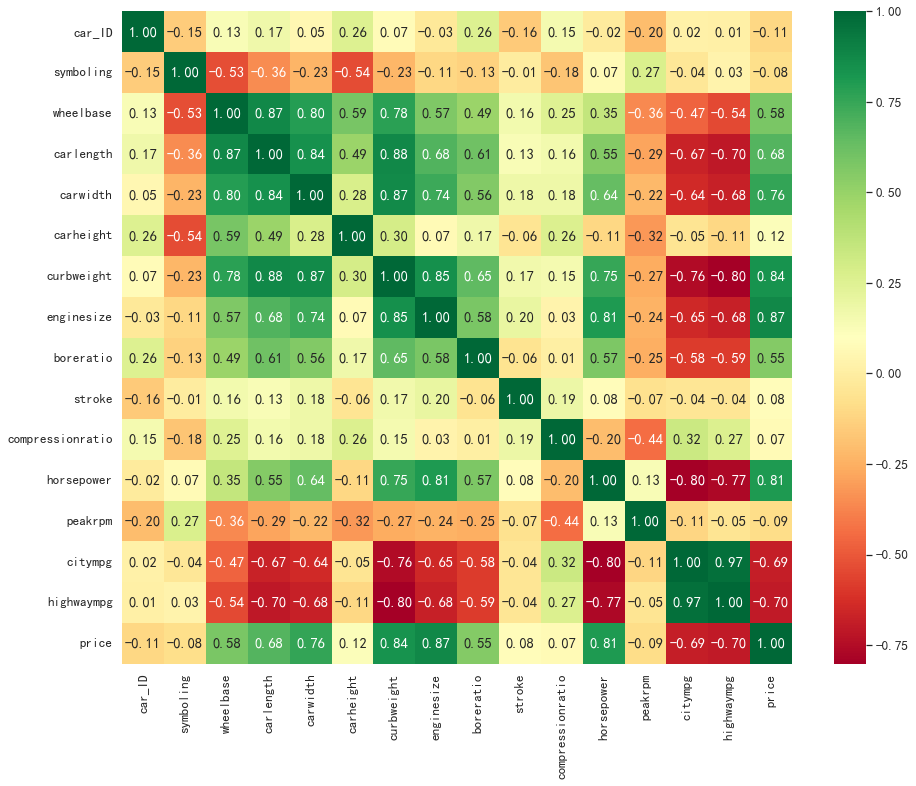

In [13]:
plt.figure(figsize=(15, 12))
# cmap：颜色图，控制显式的颜色风格。
# annot：是否显示数值，默认为False。
# fmt：指定数值格式化方式。
ax = sns.heatmap(data.corr(), cmap=plt.cm.RdYlGn, annot=True, fmt=".2f")
# 注意：Matplotlib 3.1.1版本的bug，heatmap的首行与末行会显示不全。
# 可手动调整y轴的范围来进行修复。（老版本的Matplotlib不需要调整y轴范围。）
# a, b = ax.get_ylim()
# ax.set_ylim(a + 0.5, b - 0.5)

In [14]:
category_var = []
for k, v in data.dtypes.items():
    if not np.issubdtype(v, np.number):
        category_var.append(k)
print("类别变量个数：", len(category_var))
print(category_var)

类别变量个数： 10
['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


KruskalResult(statistic=55.05140268551899, pvalue=1.2739605541044965e-10)


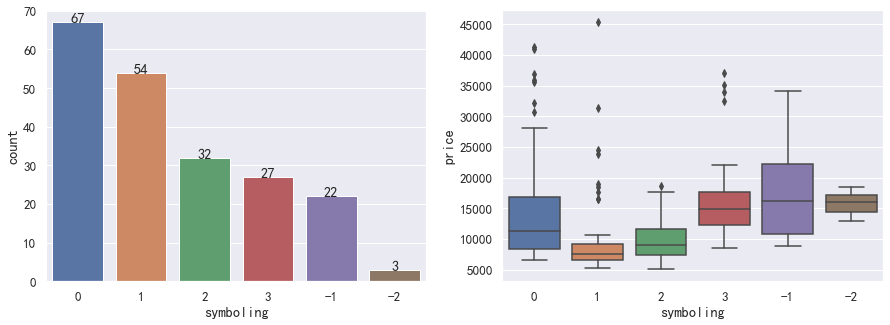

In [15]:
from scipy import stats
def category_analysis(col_name, target_name="price"):
    """对类别变量进行分析。
    分析包括绘制柱形图与箱线图。并对类别变量进行假设检验。
    Parameters
    ----------
    col_name : str
    分类变量的名称。
    target_name : str，可选。
    目标变量的名称。
    """
    v = data[col_name].value_counts()
    # 如果分类数量超过10，则显示2行，否则显示1行。
    if len(v) > 10:
        row, col = 2, 1
    else:
        row, col = 1, 2
    fig, ax = plt.subplots(row, col)
    # 根据行数不同，设置不同的高度。
    fig.set_size_inches(15, row * 5)
    sns.countplot(x=col_name, data=data, order=v.index, ax=ax[0])
    # 在图像上绘制数值。
    for x, y in enumerate(v):
        text = ax[0].text(x, y, y)
        # 文本数值居中对齐。
        text.set_ha("center")
    sns.boxplot(x=col_name, y=target_name, order=v.index, data=data, ax=ax[1])
    if len(v) > 10:
        for a in ax:
            a.set_xticklabels(a.get_xticklabels(), rotation=30)
        plt.subplots_adjust(hspace=0.3)
    # 根据col_name进行分组。
    g = data.groupby(col_name)[target_name]
    group_data = []
    g.apply(lambda s: group_data.append(s.values))
    # Kruskal-Wallis H-test，用来检验各个分组的中位数是否相等。
    # 原假设：每个分组的中位数相等。
    # 备择假设：至少存在两个分组的中位数不等。
    print(stats.kruskal(*group_data))

category_analysis("symboling")

KruskalResult(statistic=128.0293000475285, pvalue=2.3580012078648455e-17)


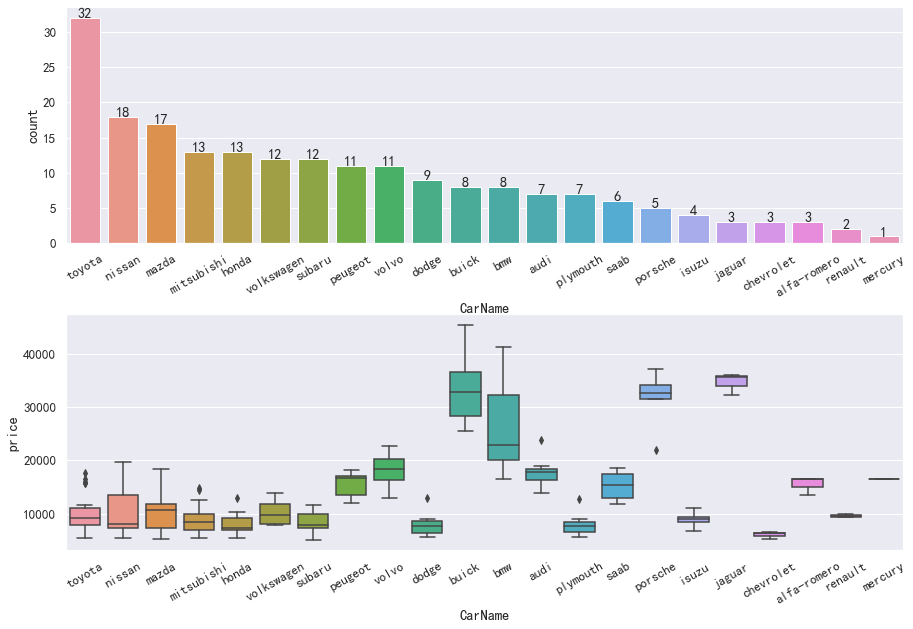

In [16]:
category_analysis("CarName")

KruskalResult(statistic=3.9833925913400314, pvalue=0.0459509243643051)


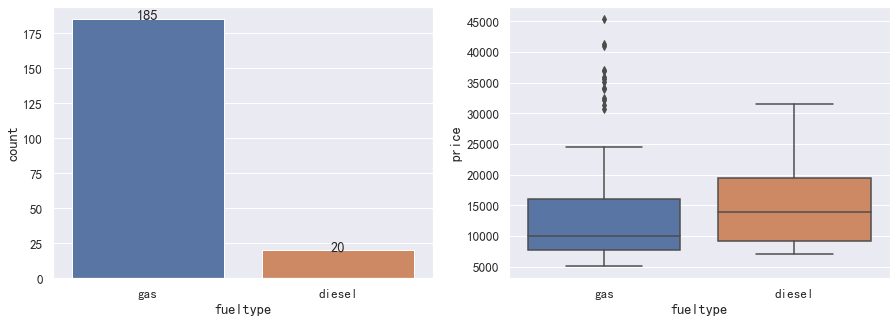

In [17]:
category_analysis("fueltype")

KruskalResult(statistic=19.47319231451774, pvalue=1.020215018682171e-05)


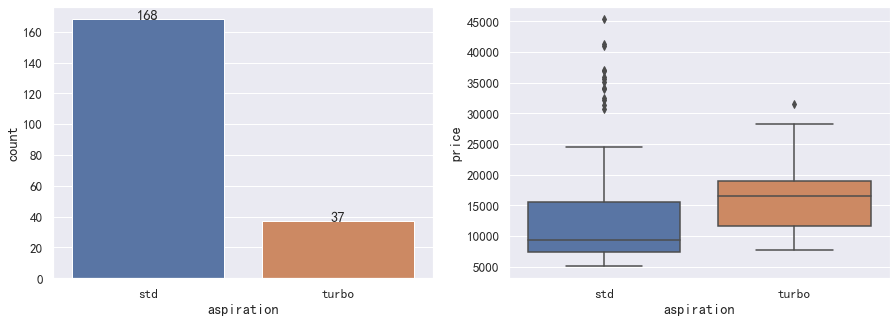

In [18]:
category_analysis("aspiration")

KruskalResult(statistic=2.8612616578123022, pvalue=0.09073630460630733)


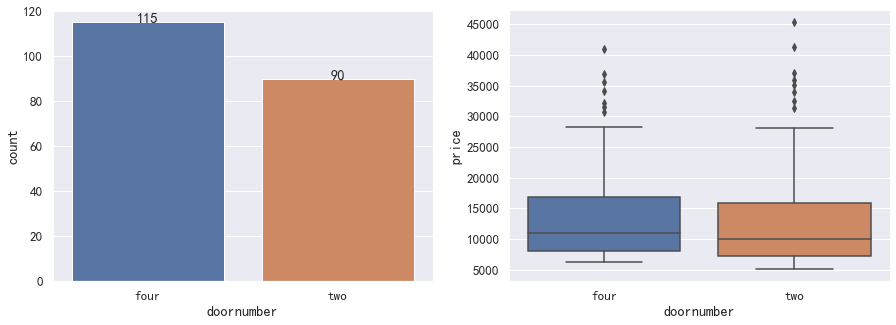

In [19]:
category_analysis("doornumber")

KruskalResult(statistic=22.183437941390444, pvalue=0.0001842534808688567)


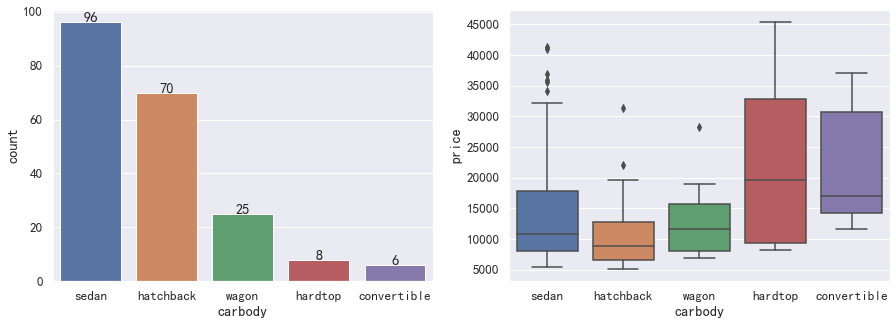

In [20]:
category_analysis("carbody")

KruskalResult(statistic=95.02387066880598, pvalue=2.3218205980565562e-21)


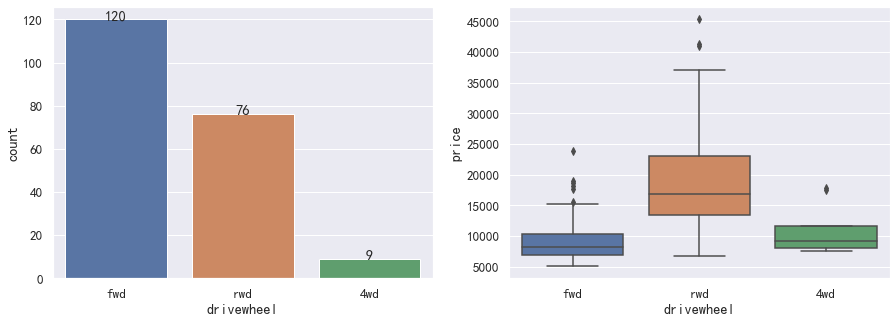

In [21]:
category_analysis("drivewheel")

KruskalResult(statistic=7.753234528191141, pvalue=0.005361642811118273)


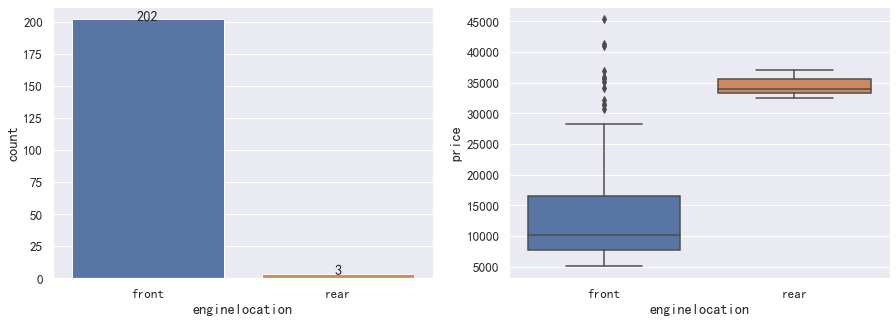

In [22]:
category_analysis("enginelocation")

KruskalResult(statistic=40.133921438590676, pvalue=4.287270740376635e-07)


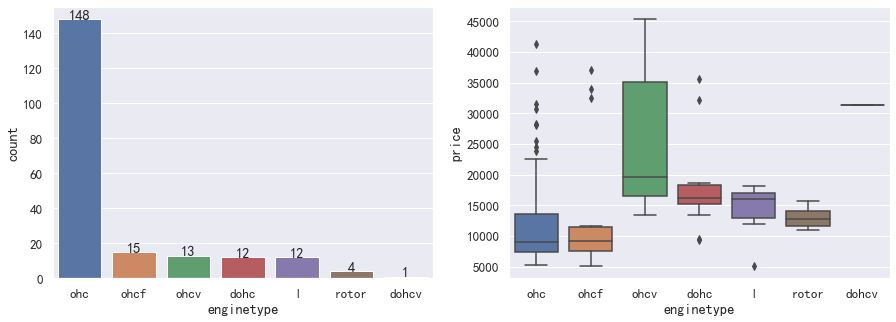

In [23]:
category_analysis("enginetype")

KruskalResult(statistic=84.76297575868743, pvalue=3.696266502144558e-16)


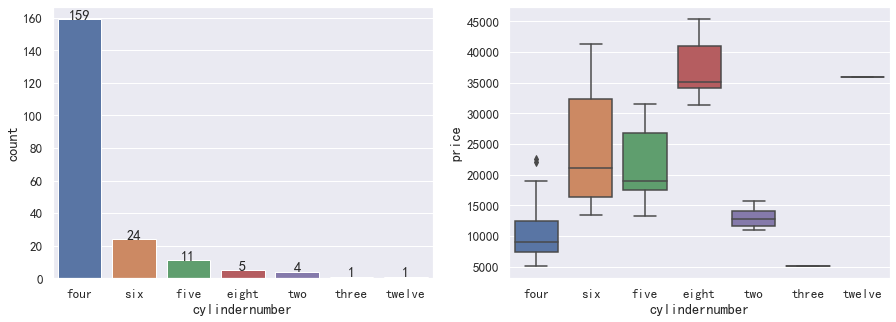

In [24]:
category_analysis("cylindernumber")

KruskalResult(statistic=125.0821070976894, pvalue=6.683871002354369e-24)


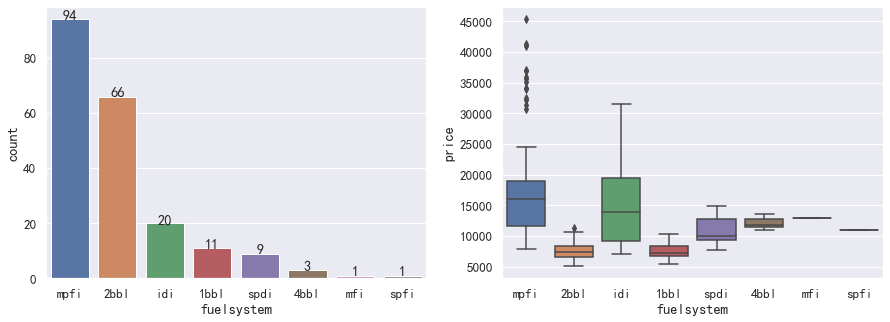

In [25]:
category_analysis("fuelsystem")

In [26]:
data.drop("car_ID", inplace=True, axis=1)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
SEED = 0
# 将Series转换为DataFrame。
X = data["enginesize"].to_frame()
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7557897278380871
0.7797940080893313


In [28]:
# 选择所有数值（连续）类型的变量。
X = data.select_dtypes(include=np.number)
y = X.pop("price")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.858252048258165
0.8214693378253446


In [29]:
# symboling当成类别变量看待。
for name in category_var + ["symboling"]:
# 对每一个类别变量，根据其取值进行分组，使用每组价格的均值，
# 来作为新的特征值。
    v = data.groupby(name)["price"].mean()
    data[name] = data[name].map(v)
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,17221.296296,15498.333333,12999.7982,12611.270833,12989.924078,21890.500000,19910.809211,12961.097361,88.6,168.8,64.1,48.8,2548,18116.416667,10285.754717,130,17754.60284,3.47,2.68,9.0,111,5000,21,27,13495.0
1,17221.296296,15498.333333,12999.7982,12611.270833,12989.924078,21890.500000,19910.809211,12961.097361,88.6,168.8,64.1,48.8,2548,18116.416667,10285.754717,130,17754.60284,3.47,2.68,9.0,111,5000,21,27,16500.0
2,10037.907407,15498.333333,12999.7982,12611.270833,12989.924078,10376.652386,19910.809211,12961.097361,94.5,171.2,65.5,52.4,2823,25098.384615,23671.833333,152,17754.60284,2.68,3.47,9.0,154,5000,19,26,16500.0
3,10109.281250,17859.166714,12999.7982,12611.270833,13501.152174,14344.270833,9239.308333,12961.097361,99.8,176.6,66.2,54.3,2337,11574.048426,10285.754717,109,17754.60284,3.19,3.40,10.0,102,5500,24,30,13950.0
4,10109.281250,17859.166714,12999.7982,12611.270833,13501.152174,14344.270833,11087.463000,12961.097361,99.4,176.6,66.4,54.3,2824,11574.048426,21630.469727,136,17754.60284,3.19,3.40,8.0,115,5500,18,22,17450.0


In [30]:
y = data["price"]
X = data.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9497131369526582
0.8868049821884441


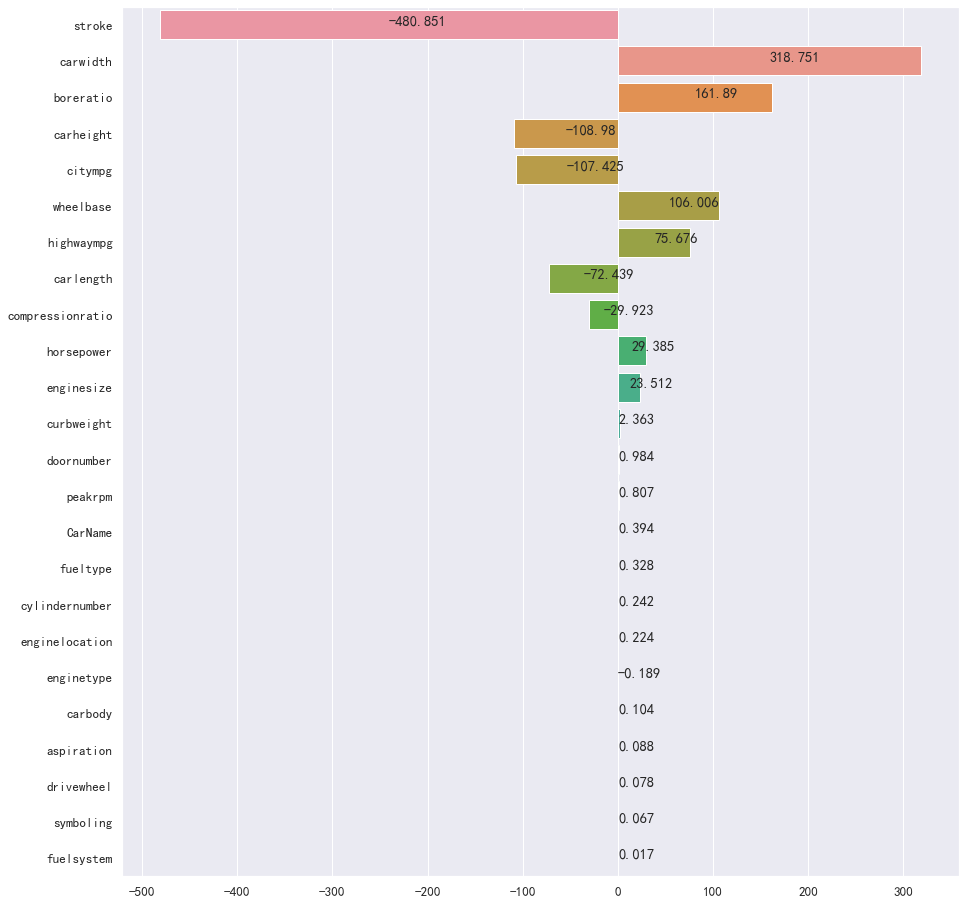

In [31]:
def plot_weight(model, names, figsize=None):
    """绘制模型的权重。
    会根据权重的绝对值进行降序排列。
    Parameters
    ----------
    model : object
    模型对象。
    names : array-like
    权重对应的名称。
    figsize : tuple
    图像尺寸。
    """
    li = list(zip(names, model.coef_))
    li.sort(key=lambda item: abs(item[1]), reverse=True)
    s = pd.Series(dict(li))
    ax = sns.barplot(y=s.index, x=s.values)
    if not figsize:
        figsize = (15, len(model.coef_) // 1.5)
    ax.get_figure().set_size_inches(figsize)
    for y, x in enumerate(s):
        ax.text(x / 2, y, round(x, 3))
    
plot_weight(lr, X_train.columns)

In [32]:
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_train_scale = x_scaler.fit_transform(X_train)
y_train_scale = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
X_test_scale = x_scaler.transform(X_test)
y_test_scale = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

# 重新将ndarray数组对象包装成DataFrame对象，方便查看。
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns)
X_test_scale = pd.DataFrame(X_test_scale, columns=X_test.columns)
display(X_train_scale.head(3))
display(X_test_scale.head(3))

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.593609,0.076162,0.0,0.0,1.0,0.335334,0.0,0.0,0.288630,0.485039,0.070707,0.525000,0.246106,0.000000,0.000000,0.156250,0.007531,0.419643,0.614379,0.125,0.161905,0.673469,0.56,0.548387
1,0.593609,0.162483,0.0,0.0,1.0,0.335334,0.0,0.0,0.355685,0.522835,0.474747,0.641667,0.263017,0.000000,0.000000,0.203125,0.000000,0.633929,0.490196,0.100,0.152381,0.265306,0.52,0.516129
2,0.985001,0.162483,0.0,0.0,0.0,0.000000,1.0,0.0,0.253644,0.384252,0.393939,0.150000,0.249666,0.106915,0.100841,0.000000,0.454130,0.580357,0.401961,0.150,0.233333,0.755102,0.16,0.225806


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.000000,0.162483,0.0,0.0,0.0,0.000000,0.0,0.0,0.189504,0.228346,0.242424,0.525000,0.038273,0.000000,0.000000,0.082031,0.0,0.312500,0.333333,0.12500,0.076190,0.346939,0.72,0.709677
1,1.000000,0.135656,0.0,0.0,1.0,0.168639,1.0,0.0,0.521866,0.680315,0.474747,0.525000,0.592790,0.483748,0.493690,0.355469,1.0,0.526786,0.464052,0.13750,0.495238,0.428571,0.24,0.258065
2,0.009787,0.414513,0.0,0.0,0.0,0.335334,0.0,0.0,0.384840,0.514961,0.454545,0.441667,0.306186,0.000000,0.418403,0.257812,1.0,0.455357,0.496732,0.09375,0.276190,0.551020,0.24,0.290323


In [33]:
lr.fit(X_train_scale, y_train_scale)
print(lr.score(X_train_scale, y_train_scale))
print(lr.score(X_test_scale, y_test_scale))

0.9497131369526582
0.8868049821884442


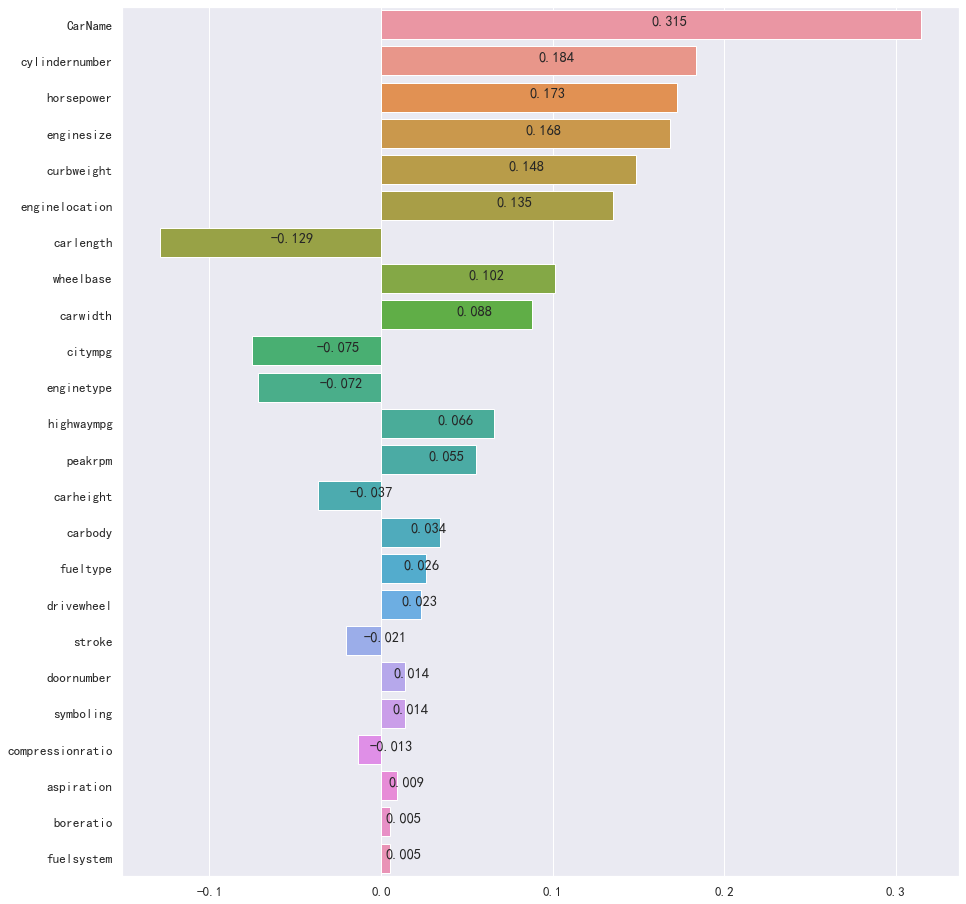

In [34]:
plot_weight(lr, X_train.columns)

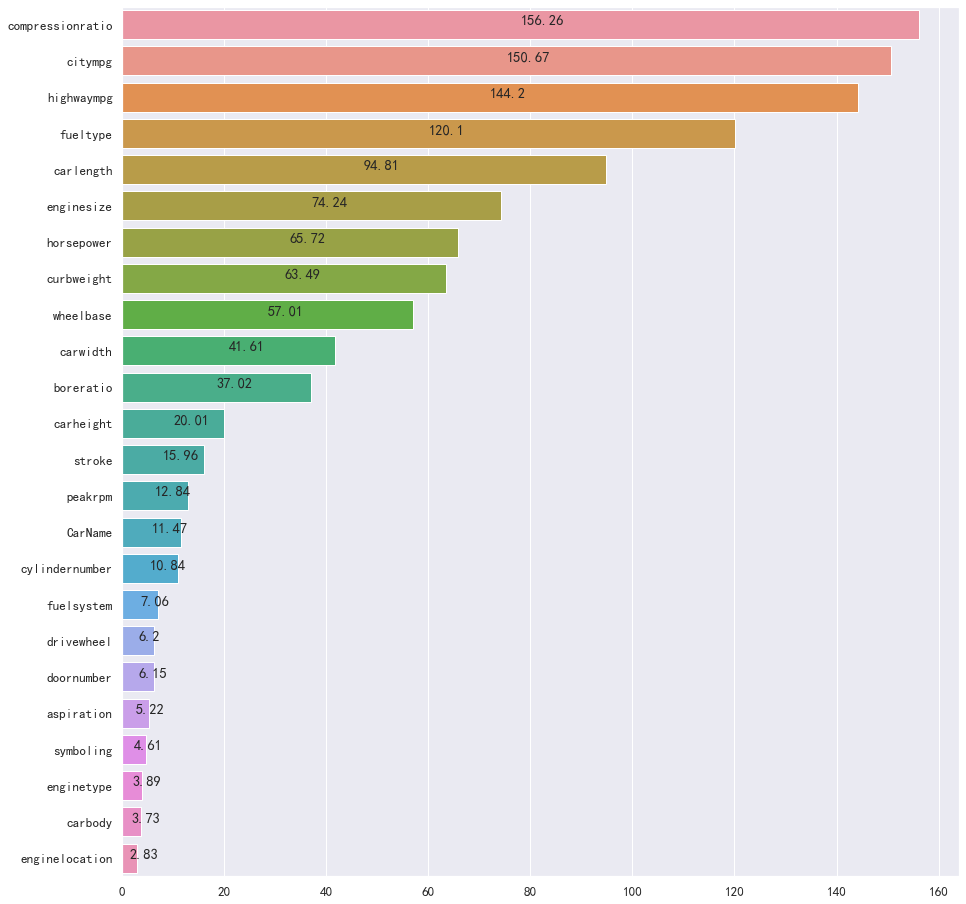

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def plot_VIF(X, figsize=None):
    """绘制特征变量的方差膨胀系数（VIF）。
    将每个特征变量以条形图的方式绘制，并进行降序排列。
    Parameters
    ----------
    X : DataFrame，形状为（样本数量， 特征数量）。
    需要计算VIF的所有变量数据。
    figsize : tuple，形状为（图像宽度，图像高度），可选。
    设置图像的宽度与高度。
    """
    # 对每一个特征变量，求解VIF值。
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    # 组成Series对象，方便对值排序时，可以与对应的列名相对应。
    s = pd.Series(vif, index=X.columns)
    s.sort_values(ascending=False, inplace=True)
    s = s.round(2)
    ax = sns.barplot(y=s.index, x=s.values)
    ax.get_figure().set_size_inches(15, X.shape[1] // 1.5)
    for y, x in enumerate(s):
        ax.text(x / 2, y, x)

plot_VIF(X_train_scale)

In [36]:
def feature_eliminate_by_VIF(X, max_vif=10, verbose=1):
    """根据特征变量的方差膨胀系数（VIF），删除特征。
    该方法每次会删除VIF最大的特征，直到所有的特征都不超过
    指定的阈值为止。
    Parameters
    ----------
    X : DataFrame，形状为（样本数量， 特征数量）。
    需要删除特征变量的数据。
    max_vif : float，可选。
    指定特征的最大VIF值，超过该值的特征将会删除。
    verbose : int，可选（1或0）。
    是否显示详细的删除信息，默认为1。
    Returns
    -------
    eli_col_names : list
    所有因为VIF大于指定阈值而被删除的特征名。
    """

    # 对参数复制，避免修改影响到参数。
    X = X.copy()
    # 用来保存所有因为VIF过大而被删除的特征名。
    eli_col_names = []
    while X.shape[1] > 0:
        vif = pd.DataFrame()
        vif["features"] = X.columns
        vif["vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        vif = vif.sort_values("vif", ascending=False)
        # 获取vif最大的行。
        s = vif.iloc[0]
        if s["vif"] > max_vif:
            X.drop(s["features"], axis=1, inplace=True)
            eli_col_names.append(s["features"])
            if verbose:
                print(f'{s["features"]}的vif值过大（{s["vif"]:.2f}），删除！')
        else:
        # 如果已经没有VIF过大的特征，则显示最终的结果，退出循环。
            display(vif)
            break
    return eli_col_names
      
drop_columns = feature_eliminate_by_VIF(X_train_scale, max_vif=10)
print(drop_columns)

compressionratio的vif值过大（156.26），删除！
highwaympg的vif值过大（143.99），删除！
carlength的vif值过大（89.89），删除！
enginesize的vif值过大（67.84），删除！
curbweight的vif值过大（53.34），删除！
wheelbase的vif值过大（43.58），删除！
horsepower的vif值过大（35.28），删除！
carwidth的vif值过大（24.59），删除！
boreratio的vif值过大（15.21），删除！
carheight的vif值过大（10.67），删除！


,features,vif
1,CarName,7.579864
13,citympg,6.661770
12,peakrpm,6.626759
11,stroke,6.533504
10,fuelsystem,5.156966
9,cylindernumber,5.105943
6,drivewheel,4.017209
0,symboling,3.434676
4,doornumber,3.270645
5,carbody,3.032210


['compressionratio', 'highwaympg', 'carlength', 'enginesize', 'curbweight', 'wheelbase', 'horsepower', 'carwidth', 'boreratio', 'carheight']


In [37]:
X_train_scale.drop(drop_columns, axis=1, inplace=True)
X_test_scale.drop(drop_columns, axis=1, inplace=True)
lr.fit(X_train_scale, y_train_scale)
print(lr.score(X_train_scale, y_train_scale))
print(lr.score(X_test_scale, y_test_scale))

0.9339202978016744
0.8522170039371532


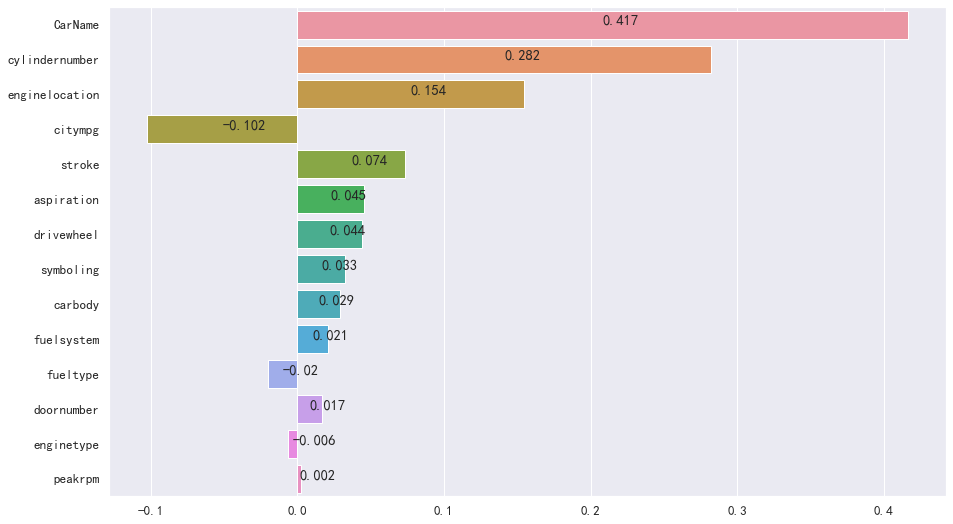

In [38]:
plot_weight(lr, X_train_scale.columns)

In [39]:
from sklearn.feature_selection import RFECV

# estimator： 要操作的模型。
# step： 每次删除的变量数。
# cv： 使用的交叉验证折数。
# n_jobs： 并发的数量。
# scoring: 评估的方式。
rfecv = RFECV(estimator=lr, step=1, cv=5, n_jobs=-1, scoring="r2")
rfecv.fit(X_train_scale, y_train_scale)
# 返回经过选择之后，剩余的特征数量。
print(rfecv.n_features_)
# 返回经过特征选择后，使用缩减特征训练后的模型。
print(rfecv.estimator_)
# 返回每个特征的等级，数值越小，特征越重要
print(rfecv.ranking_)
# 返回布尔数组，用来表示特征是否被选择。
print(rfecv.support_)
# 返回对应数量特征时，模型交叉验证的评分。
print(rfecv.cv_results_['mean_test_score'])

9
LinearRegression()
[1 1 3 1 4 1 1 1 5 1 2 1 6 1]
[ True  True False  True False  True  True  True False  True False  True
 False  True]
[0.80375872 0.85457418 0.88819254 0.88920672 0.89296809 0.89665574
 0.89781439 0.89971934 0.90554417 0.90312207 0.90114276 0.90220023
 0.90311225 0.90348766]


D:\software\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, '交叉验证$R^2$值')

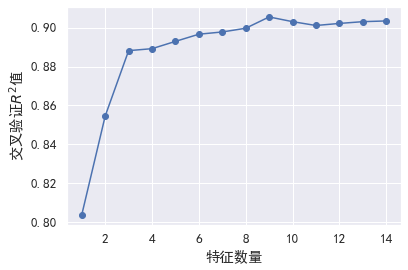

In [40]:
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.cv_results_['mean_test_score'], marker="o")
plt.xlabel("特征数量")
plt.ylabel("交叉验证$R^2$值")

In [41]:
print("剔除的变量：", X_train_scale.columns[~rfecv.support_])
X_train_eli = rfecv.transform(X_train_scale)
X_test_eli = rfecv.transform(X_test_scale)
# 说明：经过transform转换之后，返回ndarray数组类型。
# 这里X_train_scale是DataFrame类型，如果依然希望返回DataFrame类型，
# 需要我们自己去调整。
col = X_train_scale.columns[rfecv.support_]
X_train_eli = pd.DataFrame(X_train_eli, columns=col)
X_test_eli = pd.DataFrame(X_test_eli, columns=col)
print(rfecv.estimator_.score(X_train_eli, y_train_scale))
print(rfecv.estimator_.score(X_test_eli, y_test_scale))

剔除的变量： Index(['fueltype', 'doornumber', 'enginetype', 'fuelsystem', 'peakrpm'], dtype='object')
0.9318950398900173
0.8521250777462106


D:\software\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\software\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
